# Calculating gradients of a scalar stored on a structured grid

We can use Gauss's theorem to evaluate gradients of scalar field.

Gauss's theorem is,
$$
\nabla\cdot\mathbf{V} = \frac{1}{\text{vol}}\int_A\mathbf{V}\cdot\mathbf{dA}\quad\text{,}
$$
where the area $A$ encloses a volume 'vol'.

Let's say we have a scalar field $\phi=\phi(x,y,z)$. To find $\partial\phi/\partial x$ we first make a vector field,
$$
\mathbf{V}=\phi\:\mathbf{i} + 0\:\mathbf{j} + 0\:\mathbf{k}\quad\text{,}
$$
and then use Guass's theorem, 
$$
\nabla\cdot\mathbf{V} = \frac{\partial\phi}{\partial x}=\frac{1}{\text{vol}}\int_A\phi\:\mathbf{i}\cdot\mathbf{dA}=\int_A\phi\:dA_x\quad\text{,}
$$
where $dA_x$ is the x-component of the vector $\mathbf{dA}$.

We can use the same process for the other partial derivatives and so obtain a set of gradients *for each grid cell*.

The following is a 2-D example:

In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First create some data:

In [105]:
ni=11 # our data is stored on a [nj,ni] grid.
nj=21

In [106]:
xline=np.linspace(0,1,ni)
yline=np.linspace(0,1,nj)

In [107]:
x,y = np.meshgrid(xline,yline)

In [109]:
yperturb = np.outer(np.ones(nj), 0.5*np.sin(xline*2*np.pi) )
y += yperturb

In [110]:
x += 0.1*1/ni*np.random.rand(nj,ni)

In [133]:
z=x+0. # Our scalar z, is only a function of x. So we expect dz/dx=1 and dz/dy=0.

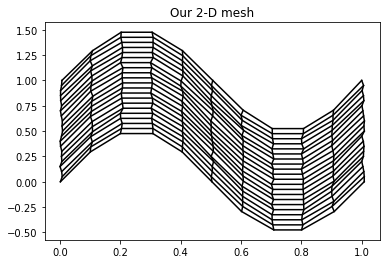

In [137]:
plt.plot(x,y,'-k')
plt.plot(x.T,y.T,'-k')
plt.title("Our 2-D mesh");

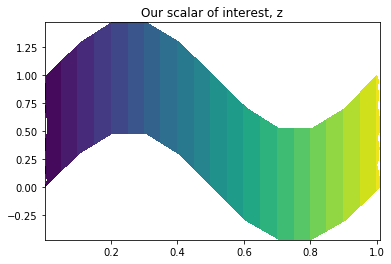

In [136]:
plt.contourf(x,y,z,21)
plt.title("Our scalar of interest, z");

Now work out the components of area on the i-faces and j-faces of the cells:

In [114]:
aix = y[1:,:]-y[:-1,:]
aiy = -(x[1:,:]-x[:-1,:])
ajx = -(y[:,1:]-y[:,:-1])
ajy = x[:,1:]-x[:,:-1]

For plotting, we will want the x and y coordinates of each *cell*

In [117]:
xavg = 0.25*(x[:-1,:-1]+x[1:,:-1]+x[-1:,1:]+x[1:,1:])
yavg = 0.25*(y[:-1,:-1]+y[1:,:-1]+y[-1:,1:]+y[1:,1:])

Now check that the areas of each cell sum to zero:

In [118]:
area_sum_x = aix[:,:-1]-aix[:,1:]+ajx[:-1,:]-ajx[1:,:]
area_sum_y = aiy[:,:-1]-aiy[:,1:]+ajy[:-1,:]-ajy[1:,:]

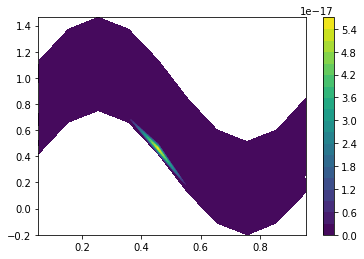

In [119]:
plt.contourf(xavg,yavg,area_sum_x,21)
plt.colorbar();

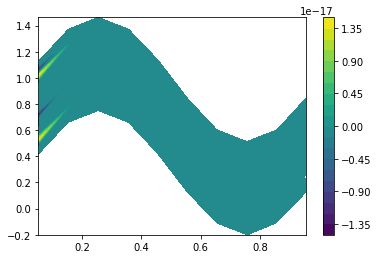

In [120]:
plt.contourf(xavg,yavg,area_sum_y,21)
plt.colorbar();

To use Gauss's theorem we also need the volume of the cell - the area in 2-D:

In [121]:
diag1_dx=x[1:,1:]-x[:-1,:-1]
diag1_dy=y[1:,1:]-y[:-1,:-1]
diag2_dx=x[1:,:-1]-x[:-1,1:]
diag2_dy=y[1:,:-1]-y[:-1,1:]
area_cell=0.5*np.abs(diag1_dx*diag2_dy - diag1_dy*diag2_dx)

The average value of z on the i-face and j-face of the cell:

In [122]:
zavg_iface=0.5*(z[:-1,:]+z[1:,:])
zavg_jface=0.5*(z[:,:-1]+z[:,1:])

Finally - use Gauss's theorem to work out the derivatives:

In [126]:
dzdx = -1./area_cell * (zavg_iface[:,:-1]*aix[:,:-1] - zavg_iface[:,1:]*aix[:,1:] 
                        + zavg_jface[:-1,:]*ajx[:-1,:] - zavg_jface[1:,:]*ajx[1:,:])

dzdy = -1./area_cell * (zavg_iface[:,:-1]*aiy[:,:-1] - zavg_iface[:,1:]*aiy[:,1:] 
                        + zavg_jface[:-1,:]*ajy[:-1,:] - zavg_jface[1:,:]*ajy[1:,:])

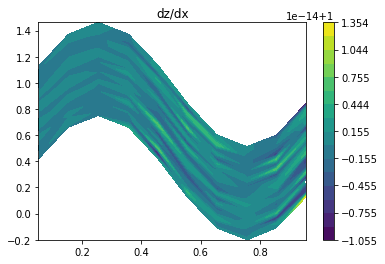

In [139]:
plt.contourf(xavg,yavg,dzdx,21)
plt.colorbar()
plt.title("dz/dx");

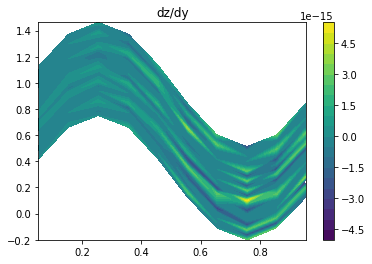

In [140]:
plt.contourf(xavg,yavg,dzdy,21)
plt.colorbar()
plt.title("dz/dy");